### Adapted from Robotics Toolbox for Python: A Tutorial on Manipulator Differential Kinematics

#### Notebook 1: Manipulator Kinematics

github.com/jhavl/dkt

In [1]:
# We will do the imports required for this notebook here

# numpy provides import array and linear algebra utilities
import numpy as np

# the robotics toolbox provides robotics specific functionality
import roboticstoolbox as rtb

# spatial math provides objects for representing transformations
import spatialmath as sm

# the matplotlib library provides plotting functionality
import matplotlib.pyplot as plt

In [2]:
models_list = rtb.models.list()

┌──────────────┬───────────────────────┬─────────────────────┬──────┬─────┬──────┬────────────────────────────────────────────────────────────┬──────────┬──────────┬──────────────────────────┐
│    class     │         name          │    manufacturer     │ type │ DoF │ dims │                                                  structure │ dynamics │ geometry │         keywords         │
├──────────────┼───────────────────────┼─────────────────────┼──────┼─────┼──────┼────────────────────────────────────────────────────────────┼──────────┼──────────┼──────────────────────────┤
│ Panda        │ Panda                 │ Franka Emika        │ DH   │ 7   │ 3d   │ RRRRRRR                                                    │ Y        │ Y        │                          │
│ Puma560      │ Puma 560              │ Unimation           │ DH   │ 6   │ 3d   │ RRRRRR                                                     │ Y        │ Y        │ dynamics, symbolic, mesh │
│ Stanford     │ Stanford arm      

In [3]:
panda_model = rtb.models.Panda()

panda_model

ERobot: panda (by Franka Emika), 7 joints (RRRRRRR), 1 gripper, geometry, collision
┌──────┬──────────────┬───────┬─────────────┬────────────────────────────────────────────────┐
│ link │     link     │ joint │   parent    │              ETS: parent to link               │
├──────┼──────────────┼───────┼─────────────┼────────────────────────────────────────────────┤
│    0 │ panda_link0  │       │ BASE        │ SE3()                                          │
│    1 │ panda_link1  │     0 │ panda_link0 │ SE3(0, 0, 0.333) ⊕ Rz(q0)                      │
│    2 │ panda_link2  │     1 │ panda_link1 │ SE3(-90°, -0°, 0°) ⊕ Rz(q1)                    │
│    3 │ panda_link3  │     2 │ panda_link2 │ SE3(0, -0.316, 0; 90°, -0°, 0°) ⊕ Rz(q2)       │
│    4 │ panda_link4  │     3 │ panda_link3 │ SE3(0.0825, 0, 0; 90°, -0°, 0°) ⊕ Rz(q3)       │
│    5 │ panda_link5  │     4 │ panda_link4 │ SE3(-0.0825, 0.384, 0; -90°, -0°, 0°) ⊕ Rz(q4) │
│    6 │ panda_link6  │     5 │ panda_link5 │ SE3(90°, -0°, 0

In [4]:
print(panda_model[1])

print(panda_model.qr)
print(panda_model.qz)

Link("panda_link1", SE3(0, 0, 0.333) ⊕ Rz(q), parent="panda_link0", qlim=[-2.9, 2.9])
[ 0.         -0.3         0.         -2.2         0.          2.
  0.78539816]
[0. 0. 0. 0. 0. 0. 0.]



Below is a schematic of a seven degree-of-freedom Franka Emika Panda manipulator. It contains 15 ETs to represent its kinematics.

<img src="https://github.com/jhavl/dkt/blob/main/Part%201/img/cover.png?raw=1" alt="drawing" width="600"/>

Using the ET class we can make all 15 of these ETs in Python


In [5]:
# Note for E7 and E11 in the figure above and code below, we use flip=True
# as the variable rotation is in the negative direction.


E1 = rtb.ET.tz(0.333)
E2 = rtb.ET.Rz()
E3 = rtb.ET.Ry()
E4 = rtb.ET.tz(0.316)
E5 = rtb.ET.Rz()
E6 = rtb.ET.tx(0.0825)
E7 = rtb.ET.Ry(flip=True)
E8 = rtb.ET.tx(-0.0825)
E9 = rtb.ET.tz(0.384)
E10 = rtb.ET.Rz()
E11 = rtb.ET.Ry(flip=True)
E12 = rtb.ET.tx(0.088)
E13 = rtb.ET.Rx(np.pi)
E14 = rtb.ET.tz(0.107)
E15 = rtb.ET.Rz()

# ets1 = rtb.ETS([E1, E2, E3])
# ets2 = ets1 * rtb.ETS([E4, E5, E6])
# print(ets2)

# We can make an ETS representing a Panda by incorporating all 15 ETs into an ETS
panda = E1 * E2 * E3 * E4 * E5 * E6 * E7 * E8 * E9 * E10 * E11 * E12 * E13 * E14 * E15

# or create a Robot instance
# robot = rtb.Robot(panda)
# print(robot)

# View the ETS
print(panda)

tz(0.333) ⊕ Rz(q0) ⊕ Ry(q1) ⊕ tz(0.316) ⊕ Rz(q2) ⊕ tx(0.0825) ⊕ Ry(-q3) ⊕ tx(-0.0825) ⊕ tz(0.384) ⊕ Rz(q4) ⊕ Ry(-q5) ⊕ tx(0.088) ⊕ Rx(180°) ⊕ tz(0.107) ⊕ Rz(q6)


In [6]:
# The ETS class has many useful properties
# print the number of joints in the panda model
print(f"The panda has {panda.n} joints")

# print the number of ETs in the panda model
print(f"The panda has {panda.m} ETs")

# We can access an ET from an ETS as if the ETS were a Python list
print(f"The fifth ET in the ETS is {panda[4]}")

# When a variable ET is added to an ETS, it is assigned a jindex, which is short for joint index
# When given an array of joint coordinates (i.e. joint angles), the ETS will use the jindices of each
# variable ET to correspond with elements of the given joint coordiante array
print(f"The first variable joint has a jindex of {panda[1].jindex}, while the second has a jindex of {panda[2].jindex}")

# We can extract all of the variable ETs from the panda model as a list
print(f"\nAll variable links in the Panda ETS: \n{panda.joints()}")

The panda has 7 joints
The panda has 15 ETs
The fifth ET in the ETS is Rz(q2)
The first variable joint has a jindex of 0, while the second has a jindex of 1

All variable links in the Panda ETS: 
[ET.Rz(jindex=0), ET.Ry(jindex=1), ET.Rz(jindex=2), ET.Ry(jindex=3, flip=True), ET.Rz(jindex=4), ET.Ry(jindex=5, flip=True), ET.Rz(jindex=6)]


In [7]:
qz = np.array([0, 0, 0, 0, 0, 0, 0]) # qz is the zero position of the Panda
qr = np.array([0, -0.3, 0, -2.2, 0, 2, 0.79]) # qr is the ready position of the Panda

fk_panda = panda.fkine(qr) # The forward kinematics of the Panda at the ready position

# The ETS class has the .fkine method which can calculate the forward kinematics
# The .fkine methods returns an SE3 object
print(f"The fkine method: \n{fk_panda}")

# The .eval method also calculates the forward kinematics but returns an numpy array
# instead of an SE3 object (use this if speed is a priority)
print(f"The eval method: \n{panda.eval(qr)}")

The fkine method: 
   0.7003   -0.7068    0.09983   0.4737    
  -0.7104   -0.7038    0         0         
   0.07027  -0.07092  -0.995     0.5155    
   0         0         0         1         

The eval method: 
[[ 7.00329021e-01 -7.06804465e-01  9.98334166e-02  4.73724040e-01]
 [-7.10353272e-01 -7.03845316e-01 -1.22464680e-16 -1.31037208e-17]
 [ 7.02672827e-02 -7.09169942e-02 -9.95004165e-01  5.15513206e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [8]:
# panda_model.qz is the zero position of the Panda
# panda_model.qr is the ready position of the Panda

fk_panda_model = panda_model.fkine(panda_model.qr) # The forward kinematics of the Panda at the ready position

# The ETS class has the .fkine method which can calculate the forward kinematics
# The .fkine methods returns an SE3 object
print(f"The fkine method: \n{fk_panda_model}")

# The .eval method to calculate the forward kinematics to return an numpy array does not work on pre-loaded models

The fkine method: 
   0.995     0         0.09983   0.484     
   0        -1         0         0         
   0.09983   0        -0.995     0.4126    
   0         0         0         1         



## Inverse Kinematics to loop through and find different configurations

In [9]:
# The ETS class has the .ikine_LM method which can calculate the inverse kinematics

ik_panda = []
ik_panda_model = []
no_of_solutions = 5

for i in range(no_of_solutions):
    ik_panda.append(panda.ikine_LM(fk_panda)) # inverse kinematics
    ik_panda_model.append(panda_model.ikine_LM(fk_panda_model)) # inverse kinematics

    print(f"\n\nSolution {i+1}:")
    print(ik_panda[i])
    print(f"The ikine method (y): \n{ik_panda[i].q}")
    print(ik_panda_model[i])
    print(f"The ikine method (z): \n{ik_panda_model[i].q}\n")



Solution 1:
IKSolution: q=[0.2331, -0.3072, -0.209, -2.199, -0.07234, 1.998, 0.8471], success=True, iterations=15, searches=1, residual=2.02e-07
The ikine method (y): 
[ 0.2330718  -0.3072249  -0.20904375 -2.19944634 -0.07233608  1.99768282
  0.84710224]
IKSolution: q=[-1.836, -1.463, 0.9586, -2.079, 1.228, 1.17, -0.08874], success=True, iterations=11, searches=1, residual=6.22e-09
The ikine method (z): 
[-1.83609368 -1.46323092  0.95862261 -2.07894433  1.22790701  1.17031741
 -0.08874445]



Solution 2:
IKSolution: q=[-0.09373, 1.372, -0.3299, 0.5718, -2.719, -0.9388, -2.219], success=True, iterations=15, searches=1, residual=3.37e-09
The ikine method (y): 
[-0.09372547  1.37240385 -0.32985608  0.57175416 -2.71867472 -0.93880854
 -2.21885877]
IKSolution: q=[2.07, -1.74, -0.791, -2.06, -1.435, 0.8637, 1.729], success=True, iterations=7, searches=1, residual=1.66e-11
The ikine method (z): 
[ 2.07034958 -1.74017621 -0.79104891 -2.06044036 -1.43527018  0.86372442
  1.7293517 ]



Soluti

In [10]:
print(ik_panda)

[IKSolution(q=array([ 0.2330718 , -0.3072249 , -0.20904375, -2.19944634, -0.07233608,
        1.99768282,  0.84710224]), success=True, iterations=15, searches=1, residual=2.0243090226577388e-07, reason='Success'), IKSolution(q=array([-0.09372547,  1.37240385, -0.32985608,  0.57175416, -2.71867472,
       -0.93880854, -2.21885877]), success=True, iterations=15, searches=1, residual=3.3661467048343105e-09, reason='Success'), IKSolution(q=array([-1.29501028,  1.47757297,  2.18942854, -2.0777745 , -1.23796061,
        1.1556852 ,  1.66867133]), success=True, iterations=8, searches=1, residual=2.917445821370403e-13, reason='Success'), IKSolution(q=array([ 1.80926972, -1.42582051, -0.97454185, -2.08207947, -1.20180133,
        1.20796337,  1.65192073]), success=True, iterations=9, searches=1, residual=1.2715485466049064e-11, reason='Success'), IKSolution(q=array([ 0.93270972,  0.43723635,  1.89605065,  1.25829692, -2.70236187,
        1.51818842,  0.57683601]), success=True, iterations=16, s

## Plotting Foward Kinematics

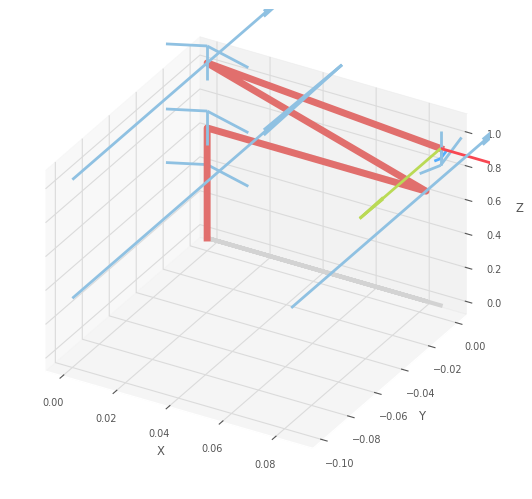

<Figure size 640x480 with 0 Axes>

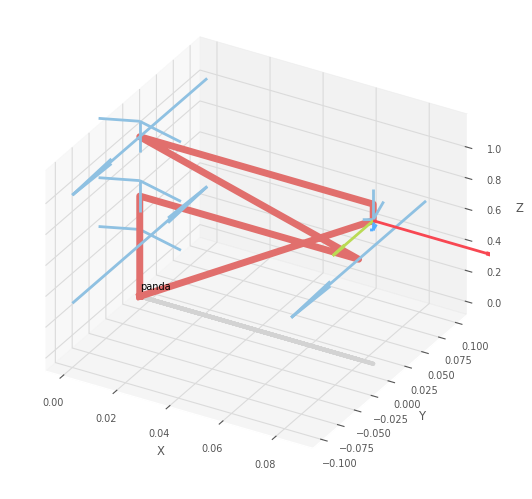

PyPlot3D backend, t = 2.499999999999999, scene:
  robot: Text(0.0, 0.0, 'panda')

<Figure size 640x480 with 0 Axes>

In [11]:
# Animate the trajectory of manipulator, panda, from qz to qr
qt = rtb.tools.trajectory.jtraj(qz, qr, 50)

qt_model = rtb.tools.trajectory.jtraj(panda_model.qz, panda_model.qr, 50)

# Plot the trajectory of the panda manipulator
panda.plot(qt.q, backend="pyplot", movie='Media/Panda FK.gif')

panda_model.plot(qt_model.q, backend="pyplot", movie='Media/Panda Model FK.gif')

## Finding Workspace of the Manipulator

In [ ]:
import random

list_of_points = [] # List of end effector positions
list_q_point = [] # List of joint angles
no_of_points = 100000

for i in range(no_of_points):
    # Define the joint limits, q_max[3] is 0 to pi
    q_max = [random.uniform(-np.pi, np.pi), random.uniform(-np.pi/2, np.pi/2), random.uniform(-np.pi, np.pi), random.uniform(0, np.pi), random.uniform(-np.pi, np.pi), random.uniform(-np.pi/2, np.pi/2), random.uniform(-np.pi, np.pi)]

    q_point = np.array(q_max)
    fk_panda = panda.fkine(q_point) # The forward kinematics of the Panda at the ready position

    list_q_point.append(q_point) # The joint angles
    list_of_points.append(fk_panda.t) # The position of the end effector

list_of_points = np.array(list_of_points)
list_q_point = np.array(list_q_point)
print(list_of_points)

[[-0.03672414  0.0149961   0.46157538]
 [ 0.32086015 -0.21962382  0.15590034]
 [ 0.3182746   0.08563279  0.81540239]
 ...
 [ 0.03298759  0.41580544  0.76026488]
 [ 0.31411407  0.45341671  0.40201305]
 [ 0.16746162  0.07548241  0.44770072]]


### Calculating Yoshikawa manipulability index for rotation axes

In [13]:
def manipulability(robot, q, axes):
    """
    Calculates the manipulability of the robot at joint configuration q

    :robot: A Robot object to find the manipulability of
    :q: The joint coordinates of the robot (ndarray)
    :axes: A boolean list which correspond with the Cartesian axes to
        find the manipulability of (6 boolean values in a list)
    """
    # calculate the Jacobian
    J = robot.jacobe(q)

    # only keep the selected axes of J
    J = J[axes, :]

    # calculate the manipulability
    m = np.sqrt(np.linalg.det(J @ J.T))

    return m

In [14]:
# Make a Panda, create a Robot instance
panda_robot = rtb.Robot(panda) # panda_model

# Only the rotation axes
rot_axes = [False, False, False, True, True, True]

list_rot_manipulability = []

for i in range(no_of_points):
    rot_manipulability = manipulability(panda_robot, list_q_point[i], rot_axes)
    list_rot_manipulability.append(rot_manipulability)

list_rot_manipulability = np.array(list_rot_manipulability)
# print(list_rot_manipulability)

### Plot the points on a 3D plot, with the color representing the manipulability index

C:\Users\Tal I\AppData\Local\Temp\ipykernel_9872\3922025438.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(scatter, ax=ax)


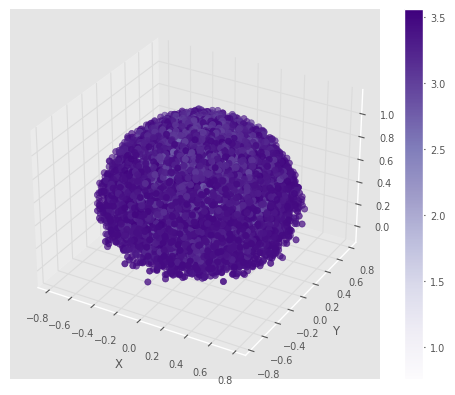

In [15]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = list_of_points[:,0]
y = list_of_points[:,1]
z = list_of_points[:,2]
c = list_rot_manipulability
cmap = plt.cm.Purples

scatter = ax.scatter(x, y, z, c=c, cmap=cmap)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

fig.colorbar(scatter, ax=ax)

plt.show()

## Plotting Inverse Kinematics solutions

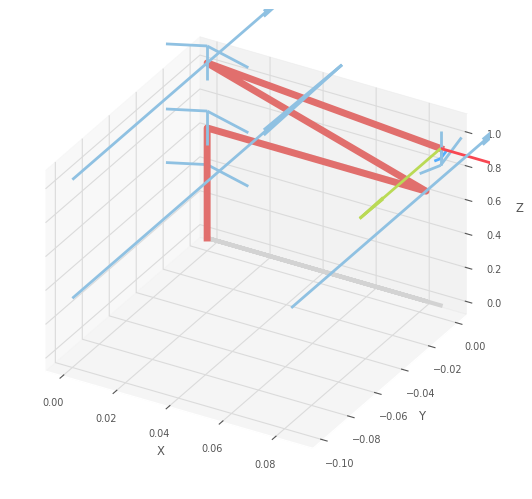

<Figure size 640x480 with 0 Axes>

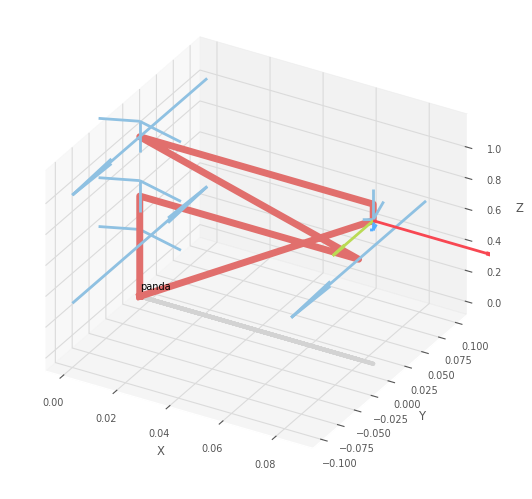

<Figure size 640x480 with 0 Axes>

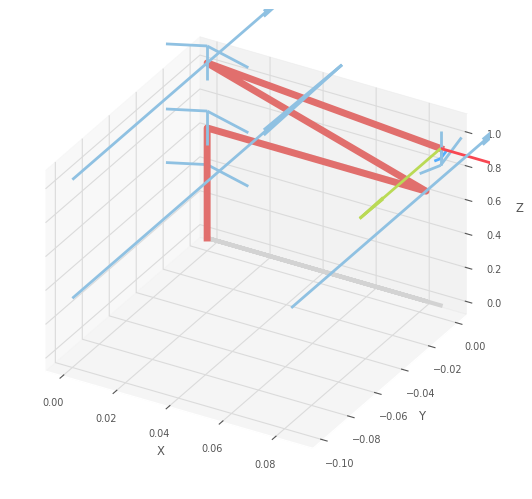

<Figure size 640x480 with 0 Axes>

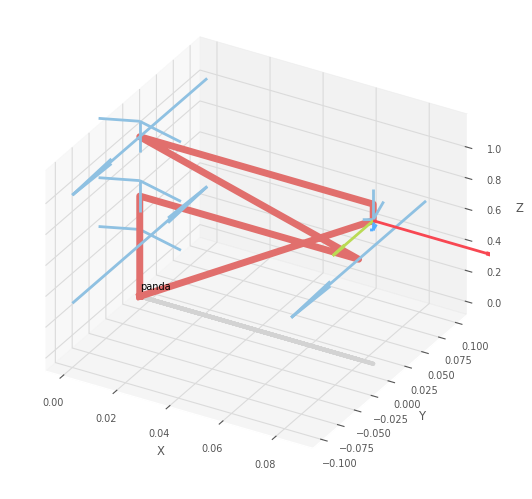

<Figure size 640x480 with 0 Axes>

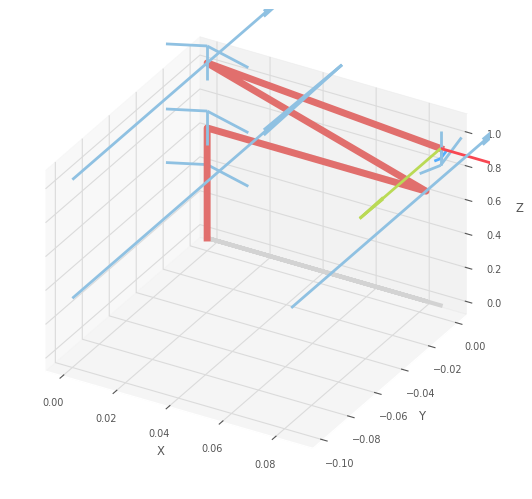

<Figure size 640x480 with 0 Axes>

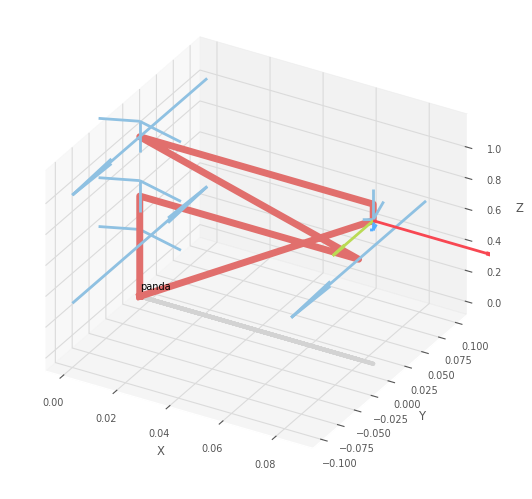

<Figure size 640x480 with 0 Axes>

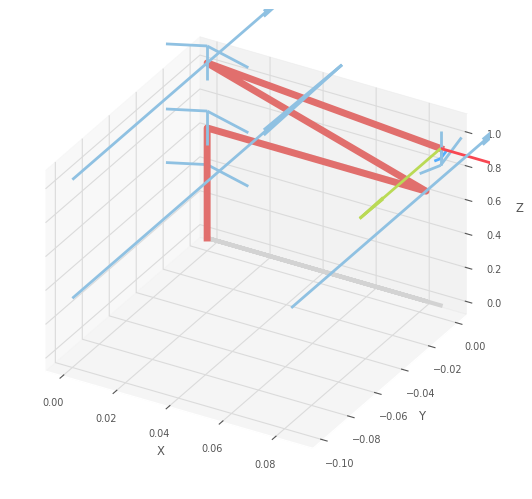

<Figure size 640x480 with 0 Axes>

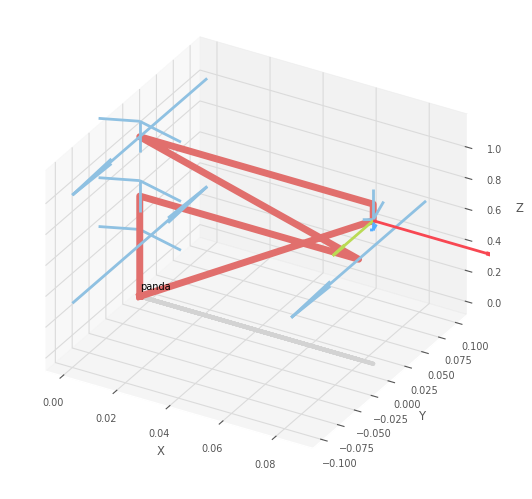

<Figure size 640x480 with 0 Axes>

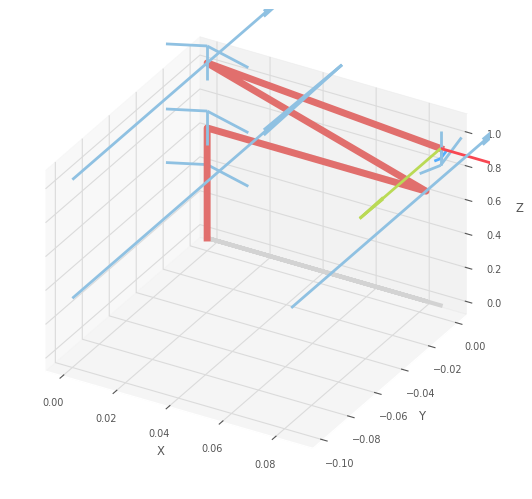

<Figure size 640x480 with 0 Axes>

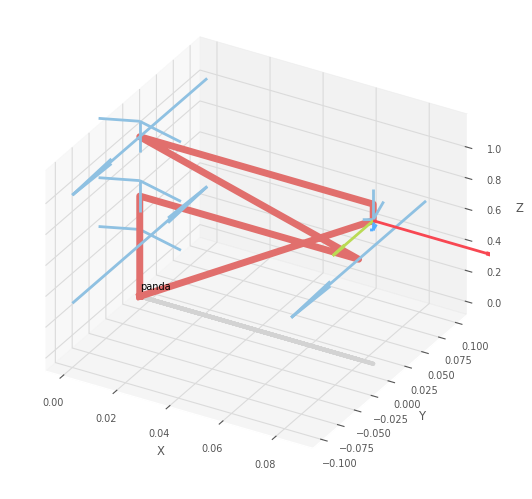

<Figure size 640x480 with 0 Axes>

In [16]:
# Animate the trajectory of manipulator, panda, from qz to ik.q

for i in range(no_of_solutions):
    qt = rtb.tools.trajectory.jtraj(qz, ik_panda[i].q, 50)

    qt_model = rtb.tools.trajectory.jtraj(panda_model.qz, ik_panda_model[i].q, 50)

    # Plot the trajectory of the panda manipulator
    panda.plot(qt.q, backend="pyplot", movie=f'Media/Panda IK{i+1}.gif')

    panda_model.plot(qt_model.q, backend="pyplot", movie=f'Media/Panda Model IK{i+1}.gif')